## Observations and Insights 
1. The tumor volume for the mice seem to decrease only for drug regimens Capomulin and Ramicane. For the rest of the drug regimens, the tumor volume increases with the timepoints. The number of mice treated with Capomulin and Ramicane drugs were more than any others. The Standard Deviation calculated for the various drugs shows that tumor volume data for Capomulin and Ramicane drugs are smaller which implies the data is distributed over a smaller ranges than other drug types.

2. The number of female and male mice used for the study was almost the same. There is no significant difference in tumor volume changes across the gender of the mice.

3. The correlation coefficient of weight and tumor volumes of the mice in Capomulin group is 0.84 which is closer to 1, which implies as the weight of the weight of the mouse increases the average tumor volume also increases in most cases.

4. The age of the mice does not have any relation with tumor volume changes.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combinedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combinedData[combinedData.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newCombinedData = combinedData.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [5]:
# Checking the number of mice in the clean DataFrame.
newCombinedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

meanVal = newCombinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medVal = newCombinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
varVal = newCombinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdVals = newCombinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
semVals = newCombinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame({'Mean' : meanVal,
                        'Variance' : varVal,
                        'Standard Deviation' : stdVals,
                        'SEM' : semVals})
summary

,Mean,Variance,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryTable1 = newCombinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
summaryTable1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

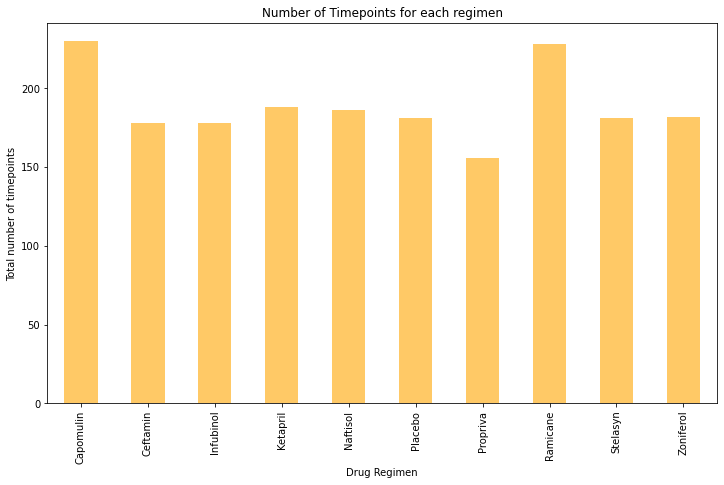

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
summary = newCombinedData.groupby('Drug Regimen')['Timepoint'].count()

summary.plot(kind='bar', ylabel="Total number of timepoints", title='Number of Timepoints for each regimen', figsize=(12,7), color=['orange'], alpha=0.6)
plt.show()

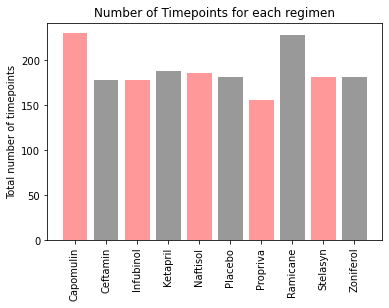

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = summary.index
yaxis = summary.values

plt.bar(xaxis, yaxis, color=['red','black'], alpha=0.4)
plt.xticks(rotation='vertical')
plt.title("Number of Timepoints for each regimen")
plt.ylabel("Total number of timepoints")
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

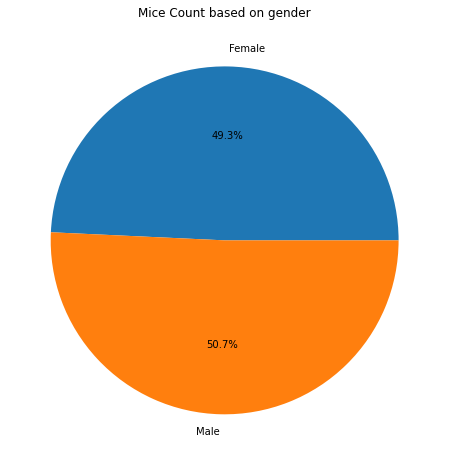

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderTable = newCombinedData.groupby('Sex')['Mouse ID'].count()
chart = genderTable.plot(kind='pie',title='Mice Count based on gender', autopct="%1.1f%%")
plt.rcParams["figure.figsize"] = (8,8)
chart.set_ylabel('')
plt.show()


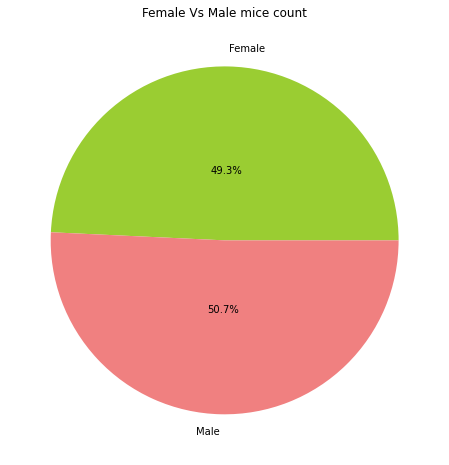

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = genderTable
labels = genderTable.index

plt.pie(counts, labels=labels, autopct="%1.1f%%", pctdistance=0.4, colors=['yellowgreen', 'lightcoral'])
plt.title("Female Vs Male mice count")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
#Calculate the Quartiles and Outliers for the drug regimens of interest for the final tumor volume

#filter the data for the concerned drugs
requiredDF = newCombinedData.rename(columns={'Drug Regimen' : 'DrugRegimen'})
requiredDF = requiredDF.query('DrugRegimen in ["Capomulin","Ramicane","Infubinol","Ceftamin"]')
requiredDF

#prepare the dataframe with the last time point and last tumor volume data
table = requiredDF.groupby(['DrugRegimen', 'Mouse ID']).agg(LastTimepoint = ('Timepoint', 'last'),
                                              LastTumorVolume = ('Tumor Volume (mm3)', 'last'))
table = table.reset_index()


In [13]:
#Calculate the Quartiles

treatments = table['DrugRegimen'].unique()
tumorData = []
lowQ = []
uprQ = []
iqrs = []
lwrBound = []
uprBound = []
potentialOutliers = []

for treatment in treatments:
    temp = table.loc[table['DrugRegimen'] == treatment, :]
    tumorData = temp['LastTumorVolume']
    outliers = []
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumorData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lowQ.append(lowerq)
    uprQ.append(upperq)
    iqrs.append(iqr)
    lowerb = lowerq - 1.5*iqr
    upperb = upperq + 1.5*iqr
    lwrBound.append(lowerb)
    uprBound.append(upperb)
    
    #store all the outliers in a single sting
    z = [x for x in tumorData if x > upperb]
    y = [x for x in tumorData if x < lowerb]
    x = y + z
    text = ''.join(str(i) for i in x)    
    potentialOutliers.append(text)
     
outliersTable = pd.DataFrame({"Drug Regimen" : treatments, "Lower quartile" : lowQ, "Upper Quartile": uprQ, "IQR": iqrs, 
                              "Lower Boundary" : lwrBound, "Upper Boundary" : uprBound, "Outliers" : potentialOutliers})
outliersTable

,Drug Regimen,Lower quartile,Upper Quartile,IQR,Lower Boundary,Upper Boundary,Outliers
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,
1,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,36.321345799999996
3,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,


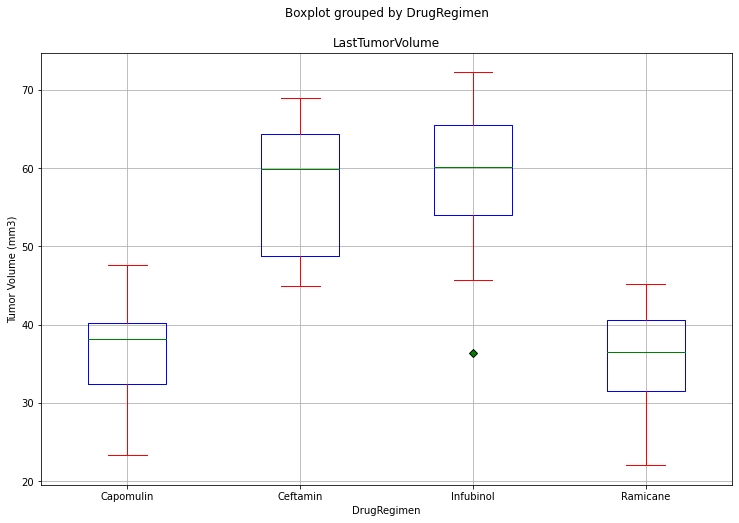

In [14]:
#Box plot for the treatments and average last tumor volume within each group
table.boxplot(by='DrugRegimen', column='LastTumorVolume', figsize=(12,8), color=dict(boxes='b', whiskers='r', medians='g', caps='r'), flierprops=dict(markerfacecolor='g', marker='D'))
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

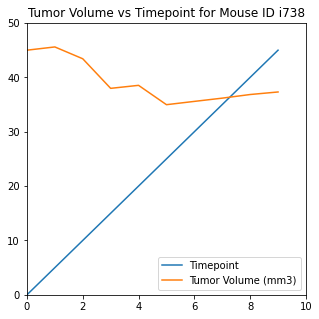

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = newCombinedData.loc[(newCombinedData['Drug Regimen'] == 'Capomulin') & (newCombinedData['Mouse ID'] == 'i738'), ['Timepoint', 'Tumor Volume (mm3)']]
capomulin.reset_index(drop=True, inplace=True)
chart =capomulin.plot(kind='line',title="Tumor Volume vs Timepoint for Mouse ID i738")
plt.xlim(0,10)
plt.ylim(0,50)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()


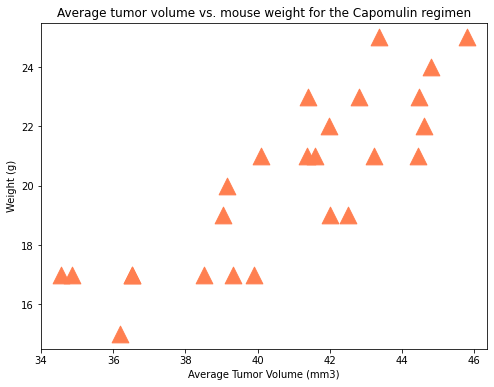

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorAndWeightData = newCombinedData.loc[newCombinedData['Drug Regimen'] == 'Capomulin', :].groupby('Mouse ID').agg(AvgTumorVolume = ('Tumor Volume (mm3)', np.mean), AvgWeight = ('Weight (g)', np.mean))
tumorAndWeightData

tumorAndWeightData.plot.scatter(x='AvgTumorVolume', y='AvgWeight', s=280, c='coral', marker='^')

plt.title('Average tumor volume vs. mouse weight for the Capomulin regimen')
plt.ylabel('Weight (g)')
plt.xlabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation coefficient for average tumor volume and weight of the mice in Capomulin regimen is 0.84
The line equation is  y = 0.74x + -10.15


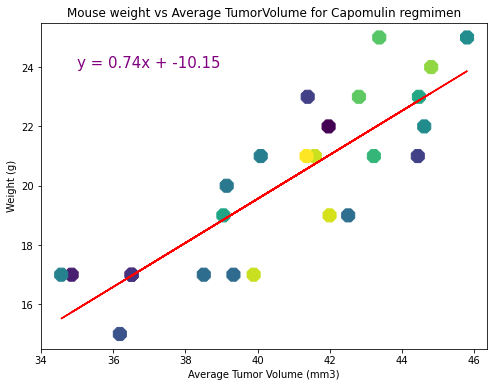

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate the correlation coefficient
correlation = st.pearsonr(tumorAndWeightData['AvgTumorVolume'],tumorAndWeightData['AvgWeight'])
print(f"The correlation coefficient for average tumor volume and weight of the mice in Capomulin regimen is {round(correlation[0],2)}")

#plot the scatter plot
x = tumorAndWeightData['AvgTumorVolume']
y= tumorAndWeightData['AvgWeight']
colors = np.random.rand(25)
plt.scatter(x,y, marker='8', c=colors, s=200)

plt.ylabel('Weight (g)')
plt.xlabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs Average TumorVolume for Capomulin regmimen')

#linear regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The line equation is ",line_eq)

#plot the line and equation on graph
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(35,24),fontsize=15,color="purple")

plt.show()
